In [95]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Carico le serie temporali e resa

In [96]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly3 = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly4.pickle', 'rb') as handle:
    allPixelNDVIPoly4 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly6.pickle', 'rb') as handle:
    allPixelNDVIPoly6 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)



# filtraggio

In [97]:
allPixelNDVIPoly3 = allPixelNDVIPoly3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

allPixelNDVIPoly4 = allPixelNDVIPoly4[(newResa4<=11000) & (newResa4 >= 4000),:]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
print(len(newResa4))

allPixelNDVIPoly6 = allPixelNDVIPoly6[(newResa6<=11000) & (newResa6 >= 4000),:]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]
print(len(newResa6))

1065
1700


# k-means su tutta la serie temporale 

In [98]:
# k-means su tutto l'asse temporale 
num_cluster = 4
num_cluster3 = 4
window3 = (6,0)
with open('./pickles/kmeans_total_3_c4.pickle', 'rb') as handle:
    clusterResult3 = pickle.load(handle)
clusterResult3 = clusterResult3[window3]

with open('./pickles/kluster_centroids_3_c4.pickle', 'rb') as handle:
    clustercentroids3 = pickle.load(handle)
clustercentroids3 = clustercentroids3[window3]

num_cluster4 = 2
window4 = (2,0)
with open('./pickles/kmeans_total_4_c2.pickle', 'rb') as handle:
    clusterResult4 = pickle.load(handle)
clusterResult4 = clusterResult4[window4]

with open('./pickles/kluster_centroids_4_c2.pickle', 'rb') as handle:
    clustercentroids4 = pickle.load(handle)
clustercentroids4 = clustercentroids4[window4]


num_cluster6 = 2
window6 = (6,0)
with open('./pickles/kmeans_total_6_c2.pickle', 'rb') as handle:
    clusterResult6 = pickle.load(handle)
clusterResult6 = clusterResult6[window4]

with open('./pickles/kluster_centroids_6_c2.pickle', 'rb') as handle:
    clustercentroids6 = pickle.load(handle)
clustercentroids6 = clustercentroids6[window6]

km_one3 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one3 = km_one3.fit_predict(allPixelNDVIPoly3)

km_one4 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one4 = km_one4.fit_predict(allPixelNDVIPoly4)

km_one6 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one6 = km_one6.fit_predict(allPixelNDVIPoly6)

# plot dei cluster

C:\Users\Leo\AppData\Local\Temp\ipykernel_7100\154752426.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


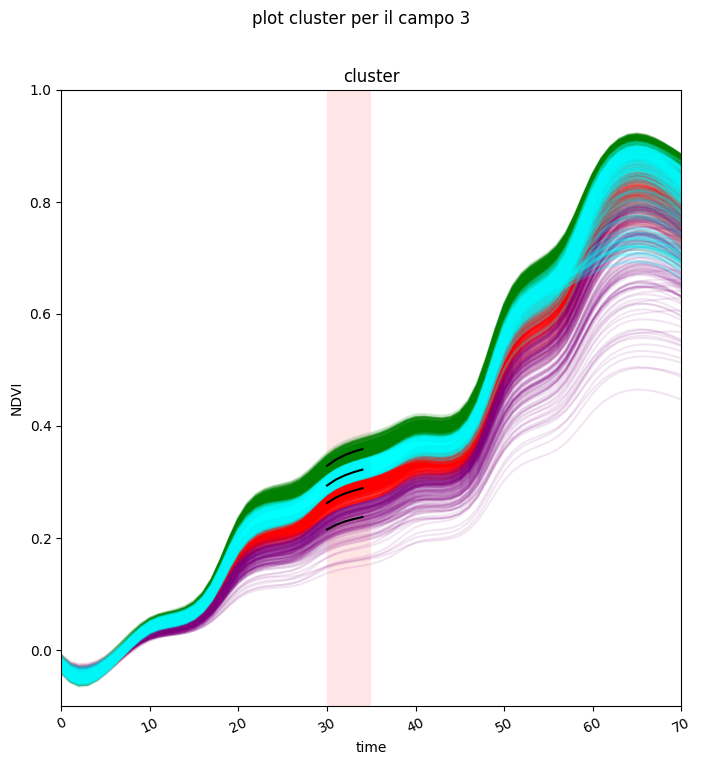

In [99]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster per il campo 3')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")
axs.set_ylim(-0.1,1)
axs.set_xlim(0,70)
for a in range(0,num_cluster3):
    for xx in allPixelNDVIPoly3[clusterResult3 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(30,35),clustercentroids3[a],color="black")

left, bottom, width, height = (30, -1, 5, 3)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
axs.add_patch(rect)
plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_7100\928972297.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


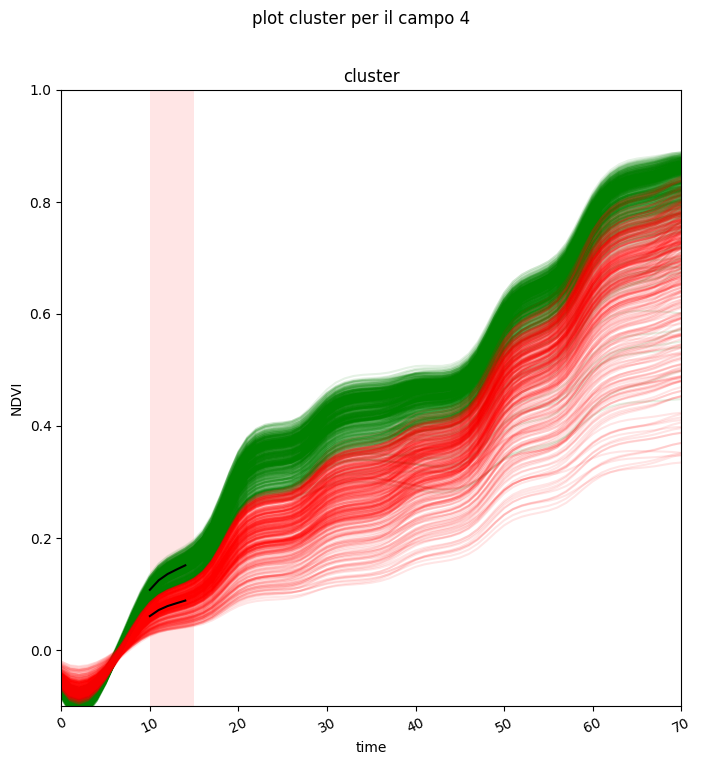

In [100]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster per il campo 4')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")
axs.set_ylim(-0.1,1)
axs.set_xlim(0,70)
for a in range(0,num_cluster4):
    for xx in allPixelNDVIPoly4[clusterResult4 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(window4[0]*5,(window4[0]+window4[1]+1)*5),clustercentroids4[a],color="black")

left, bottom, width, height = (window4[0]*5, -1, (window4[1]+1)*5, 3)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
axs.add_patch(rect)
plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1065 but corresponding boolean dimension is 1700

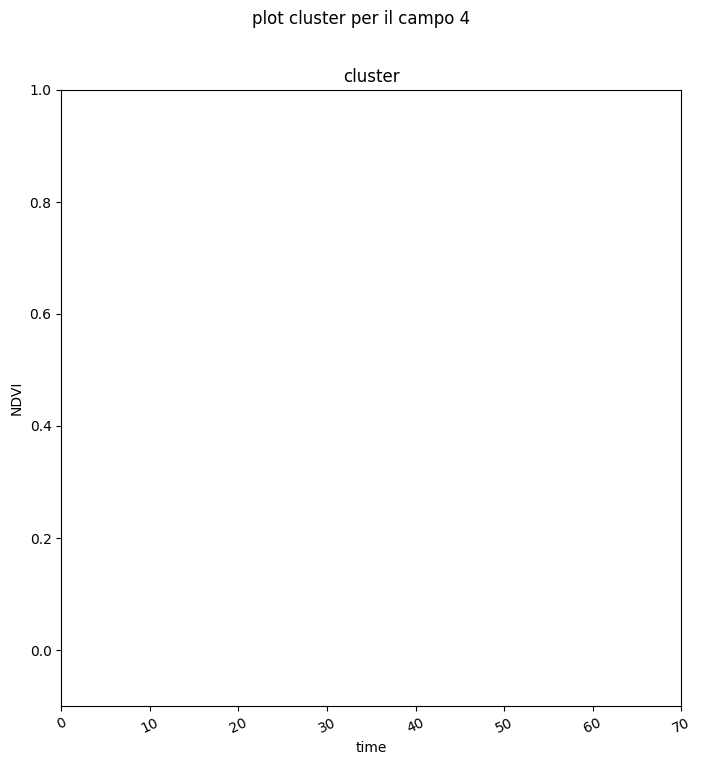

In [101]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster per il campo 6')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")
axs.set_ylim(-0.1,1)
axs.set_xlim(0,70)
for a in range(0,num_cluster6):
    for xx in allPixelNDVIPoly6[clusterResult6 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(window6[0]*5,(window6[0]+window6[1]+1)*5),clustercentroids6[a],color="black")

left, bottom, width, height = (window6[0]*5, -1, (window6[1]+1)*5, 3)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
axs.add_patch(rect)
plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

# Andiamo a stampare i nuovi cluster

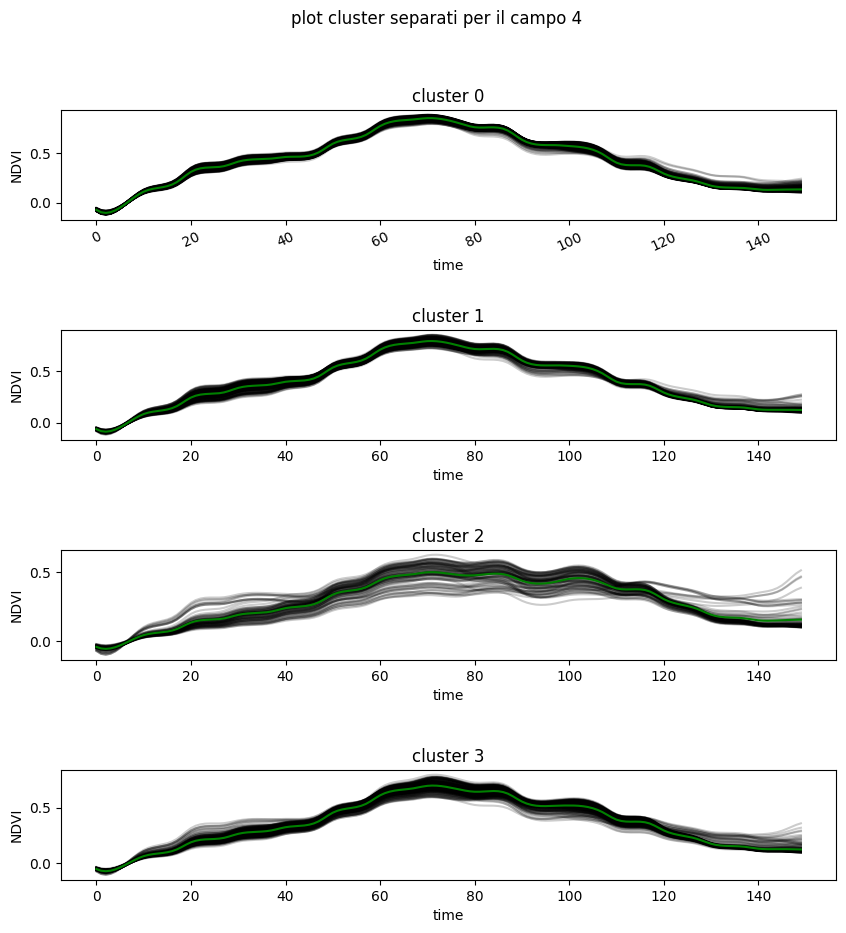

In [ ]:
fig, axs = plt.subplots(nrows=num_cluster, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle('plot cluster separati per il campo 4')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for b in range(0,num_cluster):
    
    for xx in allPixelNDVIPoly4[y_pred_one4 == b]:
        axs[b].plot(xx.ravel(), "k-", alpha=.2)

    axs[b].plot(range(0,150),km_one4.cluster_centers_[b].ravel(),color="green")
    axs[b].set_title("cluster "+str(b))
    axs[b].set_xlabel("time")
    axs[b].set_ylabel("NDVI")
    plt.sca(axs[b])

plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_7100\3682326111.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


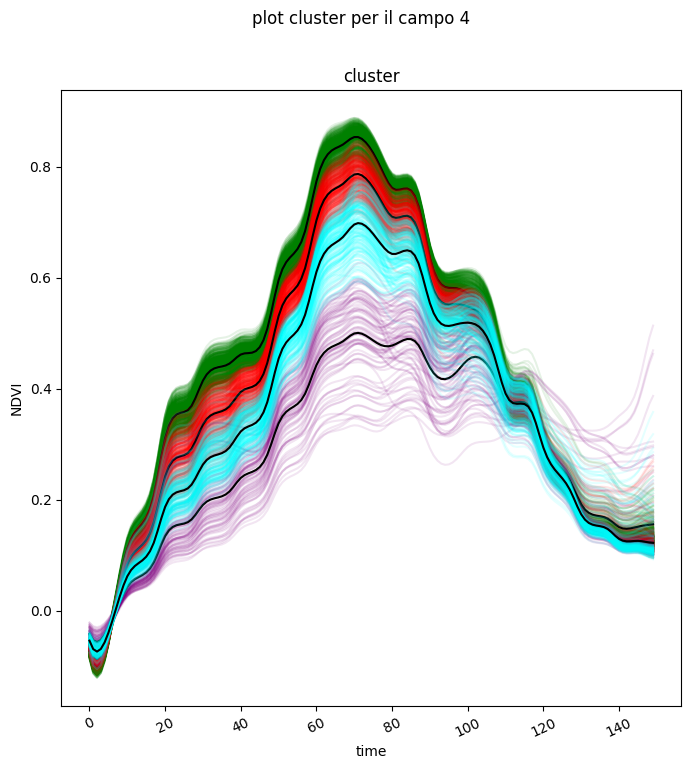

In [ ]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster per il campo 4')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")

for a in range(0,num_cluster):
    for xx in allPixelNDVIPoly4[y_pred_one4 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(0,150),km_one4.cluster_centers_[a],color="black")


plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

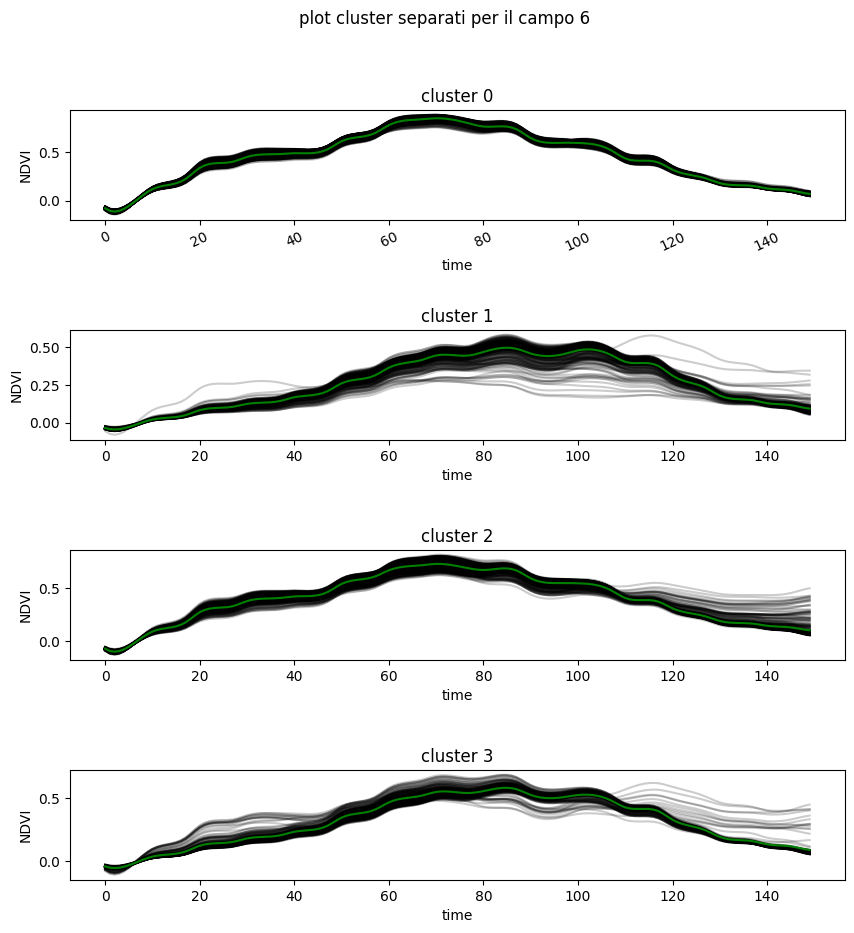

In [ ]:
fig, axs = plt.subplots(nrows=num_cluster, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle('plot cluster separati per il campo 6')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for b in range(0,num_cluster):
    
    for xx in allPixelNDVIPoly6[y_pred_one6 == b]:
        axs[b].plot(xx.ravel(), "k-", alpha=.2)

    axs[b].plot(range(0,150),km_one6.cluster_centers_[b].ravel(),color="green")
    axs[b].set_title("cluster "+str(b))
    axs[b].set_xlabel("time")
    axs[b].set_ylabel("NDVI")
    plt.sca(axs[b])

plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_7100\86771302.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


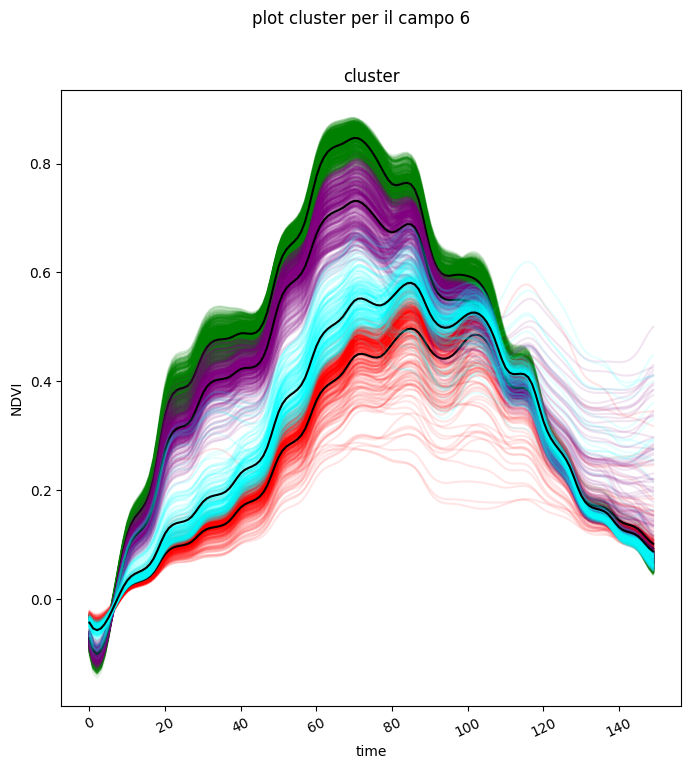

In [ ]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster per il campo 6')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")

for a in range(0,num_cluster):
    for xx in allPixelNDVIPoly6[y_pred_one6 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(0,150),km_one6.cluster_centers_[a],color="black")


plt.sca(axs)
plt.xticks(rotation=25)
plt.show()